In [ ]:
ID = "101615093" # your student id

# Assignment 2 - Quantified Self

The topic of week 2 is **Quantified Self** (QS), which is an approach to statistically quantify and improve one's quality of life by examining data derived from various wearable sensors, such as smartwatches, cell phones, etc. 
The topic is covered more thoroughly in this week's lecture and [reading assignment](https://www.liebertpub.com/doi/full/10.1089/big.2012.0002).

This assignment has several tasks for exploratory data analysis and correlation analysis for single-subject data collected via the activity tracker. In the upcoming weeks, we will expand the analysis on multiple subjects from different groups.

## Learning outcomes

Upon completing this assignment, you will be able:

1. Understand the concepts of Quantified Self and activity tracking 
2. Apply time series line plot to identify trend and seasonal components
3. Calculate the correlation between digital behavioral data features
4. Visualize data with heatmaps
5. Compare different visualization methods for daily activity data

### Table of Contents

* [Section 1: Introduction](#section_1)
    * [Section 1.1: Quantified self](#section_1_1)
    * [Section 1.2: Activity tracker data](#section_1_2)
* [Section 2: Data](#section_2)
    * [Section 2.1: Loading the data](#section_2_1)
    * [Section 2.2: Initial analysis](#section_2_2)
* [Section 3: Preprocessing](#section_3)
    * [Section 3.1: DatetimeIndex](#section_3_1)
    * [Section 3.2: Weekday Extraction](#section_3_2)
    * [Section 3.3: Feature scaling](#section_3_3)
    * [Section 3.4: Explorative visualization](#section_3_4)
        * [Section 3.4.1: Feature Scaling](#section_3_4_1)
        * [Section 3.4.2: Feature Scaling](#section_3_4_2)
* [Section 4: Activity intensity visualization](#section_4)
* [Section 5: Calories burned estimate Heatmap](#section_5)
    * [Section 5.1: Extract month and day](#section_5_1)
    * [Section 5.2: Pivot table](#section_5_2)
    * [Section 5.3: Generate Heatmap](#section_5_3)
* [Section 6: Correlations between features](#section_6)
    * [Section 6.1: What is Correlation](#section_6_1)
    * [Section 6.2: What is Pearson Correlation Coefficient](#section_6_2)
    * [Section 6.3: Standard Deviation](#section_6_3)
    * [Section 6.4: Covariance](#section_6_4)
    * [Section 6.5: Visualization of the Pearson Correlation Coefficient Matrix](#section_6_5)
    * [Section 6.6: Bivariate Plotting](#section_6_6)
* [Section 7: References](#section_7)

## Chapter 1. Introduction <a class="anchor" id="section_1"></a>

*Quantified self* is an approach to statistically quantify and improve one's quality of life by examining data derived from various wearable sensors, such as a smartwatch, cell phones, etc. 

This assignment examines the data collected from a single subject with an activity wristband. Such a device allows unobtrusive, continuous monitoring and quantification of subjects' behavior in real-life environments. We can characterize and identify patterns and changes in user's behavior using the collected data.  

Your task is to conduct an **activity analysis** based on an anonymous subject's **activity records**. Assignments consist of exploratory data analysis, feature correlation analysis, and interpretation of subjects' behavior using the quantified data.

## Chapter 1.1. Quantified Self <a class="anchor" id="section_1_1"></a>

[Quantified Self](https://quantifiedself.com/) (QS) refers to the phenomenon of self-tracking with digital devices and to the community of self-tracking device users. QS overlaps with other trends, such as *lifelogging*, incorporating various digital devices to gather data from daily life. Usually, QS aims for improvement of subjects' life quality, health or performance. Ubiquitous digital wearable devices enable unobtrusive *in-situ* data gathering, analysis, and result sharing with a wider audience. Find more about QS in this week’s reading exercise and this [article](https://www.liebertpub.com/doi/full/10.1089/big.2012.0002)[1].

## Chapter 1.2: Activity tracker data <a class="anchor" id="section_1_2"></a>

Activity trackers or fitness trackers are devices or applications for monitoring and tracking personal physical activity. The monitored features typically contains daily walking or running distance, step count, calories burned estimate, and heartbeats. The devices used for activity tracking include *smartwatches*, *wristbands*, *smartphones*, and *smartrings*. 
The data collected via these devices is usually stored and managed in a cloud service, which provides also automated data preprocessing and summarization. Since the algorithms and procedures are proprietary, the raw data is not typically available to the users. The produced activity summaries typically contain daily activity metrics, sleep quality indices, and some graphical representations that can be used for monitoring the activity and detecting changes in it. For those who are interested in how consumer-based wearable activity trackers are used in scientific research, check the review articles about the [device's validity](https://ijbnpa.biomedcentral.com/articles/10.1186/s12966-015-0314-1?billing_country=US)[2] and how they [may increase physical activity participation](https://mhealth.jmir.org/2019/4/e11819)[3].


---

## 2. Data and initial exploration <a class="anchor" id="section_2"></a>

The data used in this assignment originates from [Kaggle](https://www.kaggle.com/datasets/singhakash/fitbit-dataset). 
The original dataset contain activity data from multiple subjects collected for one year using the [Fitbit](https://www.fitbit.com) activity tracker. 
For this assignment, we have selected a subset of data from a single user, spanning over one month.

Run the next cell to import the **individual_activity.csv** file, which contains the **subject's daily activity records** from the time period between **2016-04-12** and **2016-05-11**. The data is already aggregated by day.

Run the following cell to import the packages needed in this exercise.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy.stats as stats

from sklearn.preprocessing import MinMaxScaler

if 'AALTO_JUPYTERHUB' in os.environ:
    # using jupyter sharedata directory
    DATA = '/coursedata/pa2/'
else:
    DATA = './Data/'

## figure setting
plt.rcParams.update({'font.size':20})
sns.set(style="white", font_scale=1.5)

## 2.1. Loading the data <a class="anchor" id="section_2_1"></a>

We'll start by loading the data and setting the first column (index equals to 0) containing the dates as the dataframe's index.

In [2]:
df = pd.read_csv(os.path.join(DATA,"individual_activity.csv"),index_col=0)

## 2.2. Initial analysis <a class="anchor" id="section_2_2"></a>

After loading the data, it is a good practice to inspect the data's basic characteristics and features, data types, and possible missing values or outliers. We'll use common Pandas functions for descriptive analysis.

Let's start by having a look at the first 5 rows.

In [4]:
df.head()

,Calories,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
ActivityDay,,,,,,,,,,,
2016-04-12,1985,13162,8.50,8.50,1.88,0.55,6.06,25,13,328,728
2016-04-13,1797,10735,6.97,6.97,1.57,0.69,4.71,21,19,217,776
2016-04-14,1776,10460,6.74,6.74,2.44,0.40,3.91,30,11,181,1218
2016-04-15,1745,9762,6.28,6.28,2.14,1.26,2.83,29,34,209,726
2016-04-16,1863,12669,8.16,8.16,2.71,0.41,5.04,36,10,221,773


Then check the dataframe's shape/dimensions.

In [5]:
df.shape

(30, 11)

The dataset above has 30 **rows** and 11 **columns**. Each row represents one record of the subject's activity in a single day. Columns consist of a series of basic metrics and indexes such as **calories burned estimate**, **number of steps**, **walking distances**, etc.

> Hints:
In the domain of Data Science, a **row** in a dataset can have multiple aliases, such as **observation**, **record**, or **sample**. The columns can be seen as **features**

Next, we'll check if there exists any missing values in the dataset. Missing values are counted column-wise (axis=0).

In [7]:
df.isnull().sum(axis = 0)

Calories                    0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
dtype: int64

We notice that none of the columns have missing values that need to be dealt with.

Next, we check data frame datatypes.

In [8]:
df.dtypes

Calories                      int64
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
dtype: object

We can see that there are only numerical values (integers and floats) in the dataframe. 

Finally, we will check the descriptive statistics of the data.

In [9]:
df.describe()

,Calories,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1876.966667,12520.633333,8.070000,8.070000,2.953667,0.820667,4.291333,40.000000,19.800000,227.266667,828.433333
std,105.030532,2099.429405,1.378217,1.378217,1.127736,0.448222,1.088579,14.564956,10.185859,40.484082,173.564990
min,1728.000000,9705.000000,6.280000,6.280000,1.060000,0.210000,2.240000,16.000000,5.000000,130.000000,539.000000
25%,1790.250000,10635.250000,6.850000,6.850000,2.300000,0.485000,3.395000,30.250000,11.250000,205.250000,730.500000
50%,1848.000000,12438.000000,8.080000,8.080000,2.865000,0.735000,4.410000,38.500000,19.500000,219.000000,790.000000
75%,1956.500000,13991.250000,8.872500,8.872500,3.510000,1.110000,5.037500,46.000000,26.250000,250.750000,834.500000
max,2159.000000,18134.000000,12.210000,12.210000,6.400000,2.120000,6.060000,78.000000,46.000000,328.000000,1218.000000


The table shows that some of the features are of different scales.

---

## 3. Preprocessing and explorative visualization <a class="anchor" id="section_3"></a>


Similar to week 1, we'll do some data preprocessing in this section. The following steps will be carried out:

1) Convert timestamps into `datetime objects`

2) Extract weekday information from the converted timestamps

3) Scale numerical features into the same range.

After that, we'll visualize the data.

### 3.1. DateTimeIndex <a class="anchor" id="section_3_1"></a>
Let's have a look at the dataframe index. The index contains observation timestamps (days). 

In [3]:
df.index

Index(['2016-04-12', '2016-04-13', '2016-04-14', '2016-04-15', '2016-04-16',
       '2016-04-17', '2016-04-18', '2016-04-19', '2016-04-20', '2016-04-21',
       '2016-04-22', '2016-04-23', '2016-04-24', '2016-04-25', '2016-04-26',
       '2016-04-27', '2016-04-28', '2016-04-29', '2016-04-30', '2016-05-01',
       '2016-05-02', '2016-05-03', '2016-05-04', '2016-05-05', '2016-05-06',
       '2016-05-07', '2016-05-08', '2016-05-09', '2016-05-10', '2016-05-11'],
      dtype='object', name='ActivityDay')

The dataframe index column contains strings and has a data type of `object`, which is not exactly what we would like to use.

&#x1F4DD; **TASK:** Your task is to **convert the dataframe index column into the [datetime64](https://numpy.org/doc/stable/reference/arrays.datetime.html) format**. 

> *Hint*: check Pandas documentation for [pandas.to_datetime()](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) function.

In [4]:
df.index = pd.to_datetime(df.index)

In [5]:
df.index

DatetimeIndex(['2016-04-12', '2016-04-13', '2016-04-14', '2016-04-15',
               '2016-04-16', '2016-04-17', '2016-04-18', '2016-04-19',
               '2016-04-20', '2016-04-21', '2016-04-22', '2016-04-23',
               '2016-04-24', '2016-04-25', '2016-04-26', '2016-04-27',
               '2016-04-28', '2016-04-29', '2016-04-30', '2016-05-01',
               '2016-05-02', '2016-05-03', '2016-05-04', '2016-05-05',
               '2016-05-06', '2016-05-07', '2016-05-08', '2016-05-09',
               '2016-05-10', '2016-05-11'],
              dtype='datetime64[ns]', name='ActivityDay', freq=None)

In [6]:
# Check if the index is of datetime64 data type
is_datetime64_index = pd.api.types.is_datetime64_any_dtype(df.index)

if is_datetime64_index:
    print("The index of the DataFrame is of datetime64 data type.")
else:
    print("The index of the DataFrame is not of datetime64 data type.")

The index of the DataFrame is of datetime64 data type.


In [ ]:
# Hidden tests


### 3.2. Weekday extraction from DateTimeIndex <a class="anchor" id="section_3_2"></a>

Next, we'll extract the weekday information from `df.index` that we just converted into datetime format.

&#x1F4DD; **TASK:** Create **a new column** named *Weekday* in the dataframe and assign for each row the corresponding weekday name (*Monday*, *Tuesday*,...) as a string. Make sure that *Weekday* column is the last one in the dataframe (otherwise, hidden tests in the following cell might fail).

> *Hint*: Check what attributes [pandas.DatetimeIndex](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html) has already.

In [7]:
# Extract weekday information and create a new "Weekday" column
df['Weekday'] = df.index.day_name()

# Reorder the columns to make "Weekday" the last one
columns = list(df.columns)
columns.remove('Weekday')
columns.append('Weekday')
df = df[columns]
df.head()

,Calories,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Weekday
ActivityDay,,,,,,,,,,,,
2016-04-12,1985,13162,8.50,8.50,1.88,0.55,6.06,25,13,328,728,Tuesday
2016-04-13,1797,10735,6.97,6.97,1.57,0.69,4.71,21,19,217,776,Wednesday
2016-04-14,1776,10460,6.74,6.74,2.44,0.40,3.91,30,11,181,1218,Thursday
2016-04-15,1745,9762,6.28,6.28,2.14,1.26,2.83,29,34,209,726,Friday
2016-04-16,1863,12669,8.16,8.16,2.71,0.41,5.04,36,10,221,773,Saturday


In [8]:
# UNIT TESTS (do not modify)
assert df.columns[-1] == 'Weekday', 'Last column of the dataframe is not Weekday'
assert df.Weekday[0] == 'Tuesday'
assert df.Weekday[10] == 'Friday'
assert df.Weekday[25] == 'Saturday'

### 3.3. Feature Scaling <a class="anchor" id="section_3_3"></a>

Since the features have different scales, we normalize the columns by creating a custom **min-max-scaler** (or min-max-normalization) function. This allows direct comparison and visualization using a single plot. More information about feature scaling can be found for example at [this wikipedia article](https://en.wikipedia.org/wiki/Feature_scaling).

&#x1F4DD; **TASK:** Implement the `min_max_scaler` function which scales a `numpy.ndarray` by its **min** and **max** values. 

Min-max-scaler is defined as:

$$X_{norm} = \frac{X - X.min()}{X.max() - X.min()}$$

where $X$ refers to the data to be scaled (normalized).

You are not allowed to use existing library functions in this exercise.


In [9]:
def min_max_scaler(array: np.ndarray) -> np.ndarray:
    """
    Args:
        A 1-D numpy array

    Returns:
        A 1-D numpy array
    
    Raises:
        TypeError if the input is not a ndarray
    """
    
    if not isinstance(array, np.ndarray):
        raise TypeError("Invalid input type")

    # Calculate the minimum and maximum values in the array
    min_val = np.min(array)
    max_val = np.max(array)
    
    # Check if min_val and max_val are the same, to avoid division by zero
    if min_val == max_val:
        return np.zeros_like(array)  # Return an array of zeros if min and max are the same
    
    # Apply min-max scaling to the array
    scaled_array = (array - min_val) / (max_val - min_val)
    
    return scaled_array


In [25]:
# UNIT TEST (do not modify)
assert np.array_equal(
    min_max_scaler(
        np.array([1,3,5,7,9])
    ),
    np.array([0,0.25,0.5,0.75,1])
), "invalid solution for min_max_scaler"


### 3.4. Explorative visualization <a class="anchor" id="section_3_4"></a>

We'll create a new copy of the dataframe and replace the values with the scaled version using our `min_max_scaler` function.

In [10]:
df_scaled = df.copy(deep=True)

In the following cell, we iterate and replace all columns (except the last column containing *Weekday* strings) with min-max-scaled values.

In [11]:
for column in df.iloc[:,:-1]:
    df_scaled[column] = min_max_scaler(df[column].to_numpy())

#### 3.4.1. Feature boxplots <a class="anchor" id="section_3_4_1"></a>

Next, we'll visualize the distribution of each transformed feature using boxplots on the scaled dataframe.

Before we plot the dataframe using `seaborn`, we need to convert the dataframe from wide to long format. We use the [melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) function for Dataframe where one or more columns are identifier variables (`id_vars`), with the remaining columns being measured variables (`value_vars`). For more information about wide and long data formats, refer to [this wikipedia article](https://en.wikipedia.org/wiki/Wide_and_narrow_data).

In [12]:
df_copy_melt = pd.melt(df_scaled.iloc[:,:-1])
df_copy_melt

,variable,value
0,Calories,0.596288
1,Calories,0.160093
2,Calories,0.111369
3,Calories,0.039443
4,Calories,0.313225
...,...,...
325,SedentaryMinutes,0.432990
326,SedentaryMinutes,0.051546
327,SedentaryMinutes,0.435935
328,SedentaryMinutes,0.304860


Next, we'll create a feature-wise boxplot: 

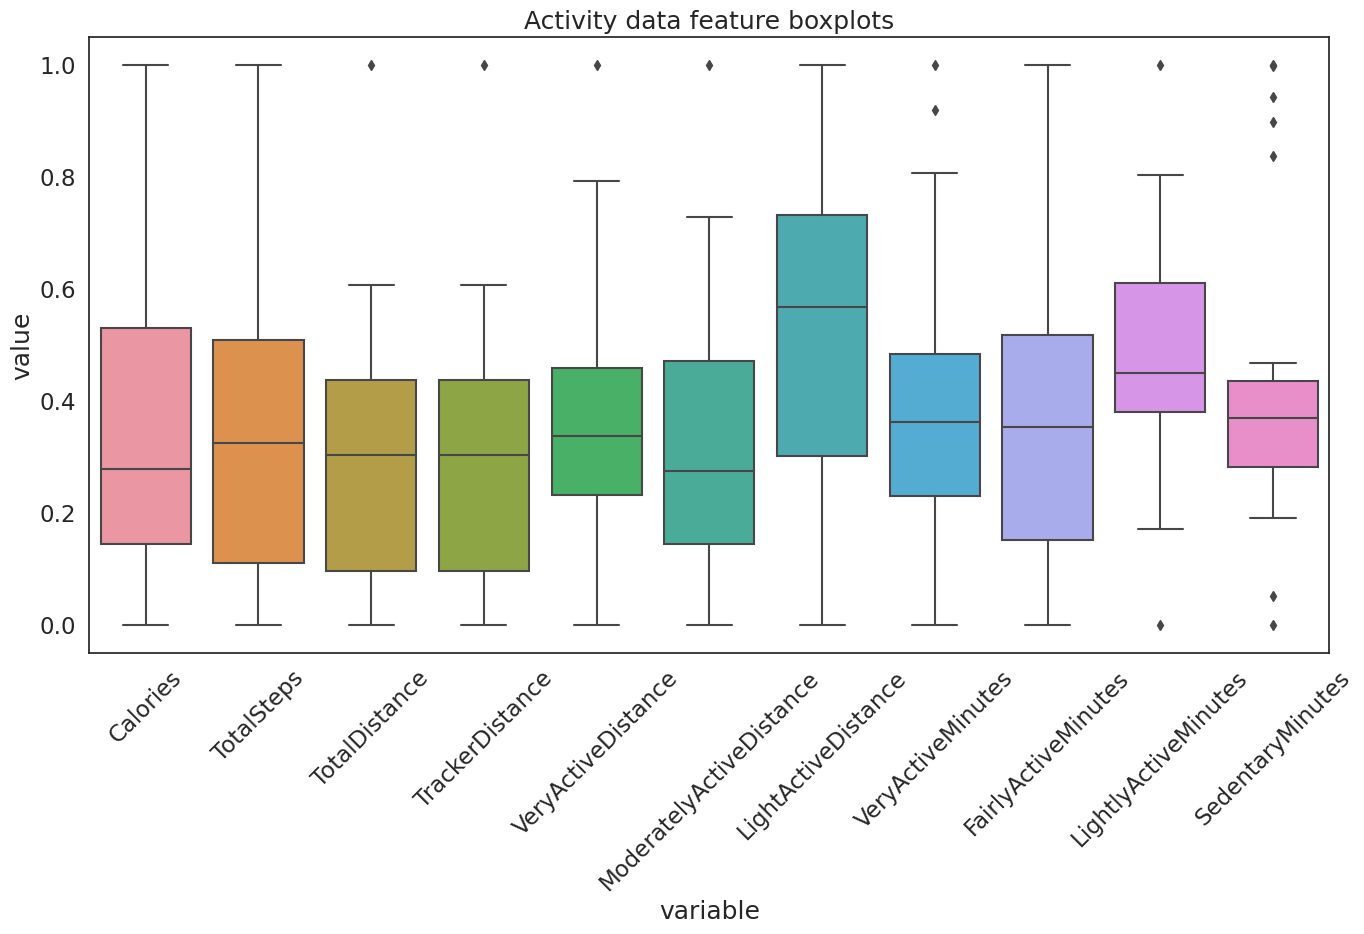

In [31]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(x="variable",
                 y="value", 
                 data=df_copy_melt)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
ax.set(title='Activity data feature boxplots')

plt.show()

We'll see that the feature **SedentaryMinutes** has more outlying values than other features. Notice, that the boxplots show the scaled values.

### 3.4.2. Activity distributions by weekday <a class="anchor" id="section_3_4_2"></a>

Then, we'll plot daily activity distributions using weekday information extracted before. We are interested in **TotalSteps** and **SedentaryMinutes** information. Daily step count serves as a good overall **proxy for subjects' physical activity level**. We are also interested in inspecting sedentary minutes since the previous boxplot displayed some outliers we'd like to inspect further.

Next, we'll plot daily distributions for the total step count. We will superimpose boxplots and individual observations in one figure.

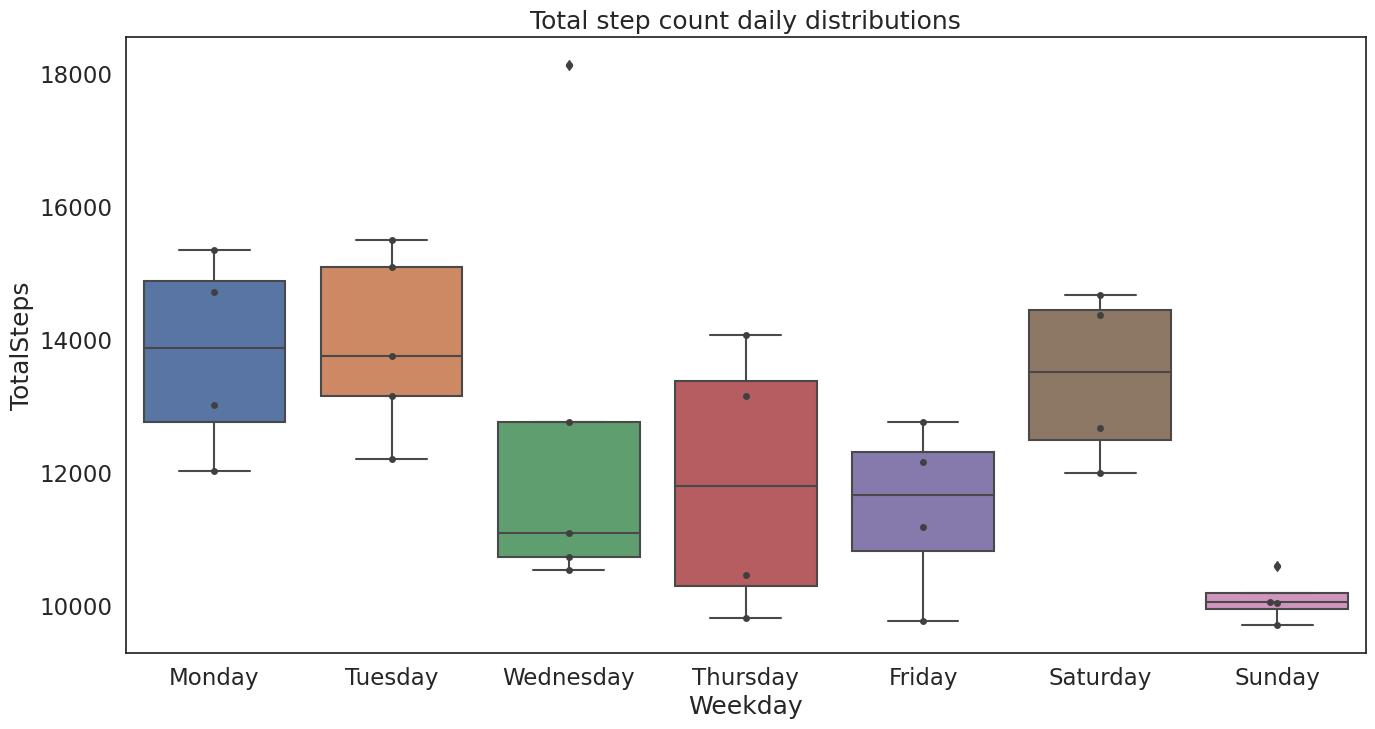

In [32]:
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

plt.figure(figsize=(16,8))

ax = sns.boxplot(y="TotalSteps",
                 x="Weekday",
                 order=order,
                 data=df)

ax = sns.swarmplot(y="TotalSteps", 
                   x="Weekday",
                   order=order,
                   data=df, 
                   color=".25")

ax.set(title='Total step count daily distributions')

plt.show()

We'll observe that the step count on Sundays is significantly lower compared to other days.

Next, we'll plot a similar plot for sedentary minutes.

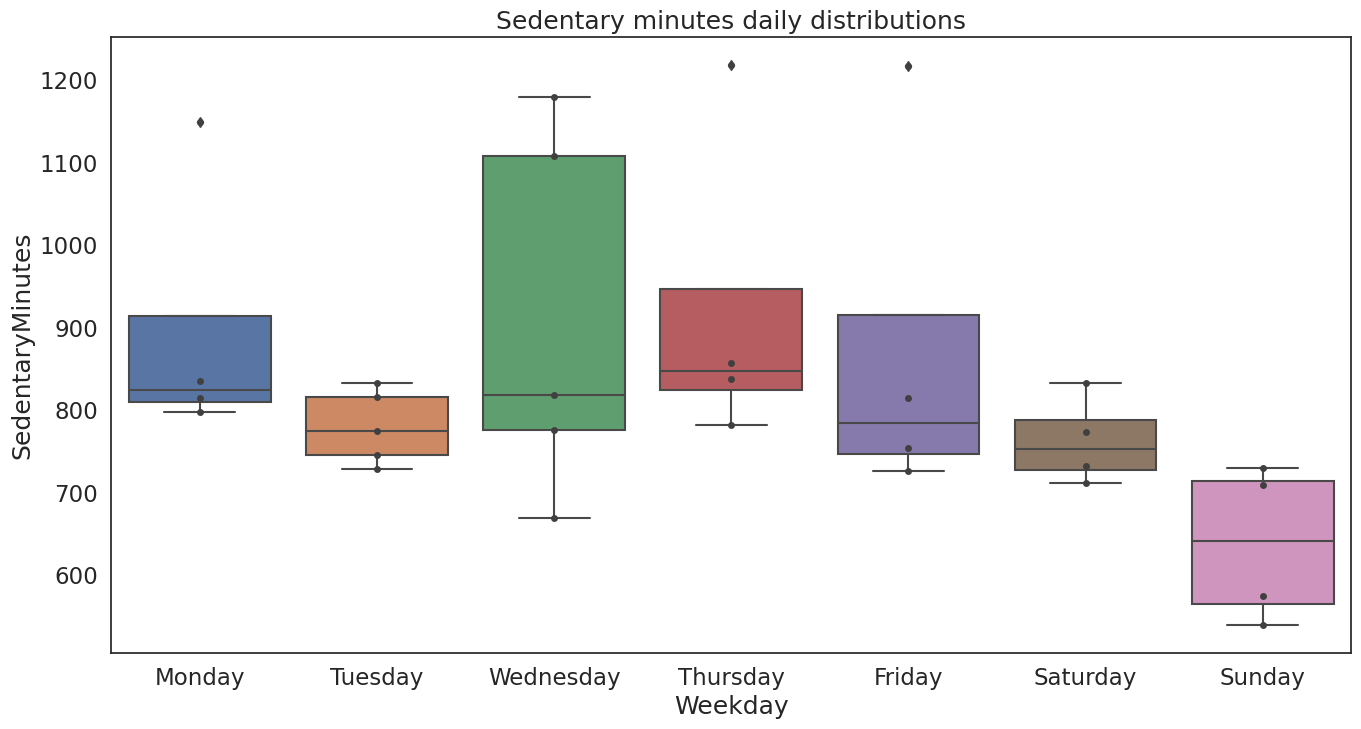

In [33]:
plt.figure(figsize=(16,8))

ax = sns.boxplot(y="SedentaryMinutes",
                 x="Weekday",
                 order=order,
                 data=df)

ax = sns.swarmplot(y="SedentaryMinutes", 
                   x="Weekday",
                   order=order,
                   data=df, 
                   color=".25")

ax.set(title='Sedentary minutes daily distributions')

plt.show()

Here, we'll notice that the sedentary minutes are at the lowest level on Sundays.

Take a moment to study the visualization. How would you explain the findings? Note also the number of data points and how it affects the results.

&#x1F4DD; **TASK:** Using a few sentences, propose an interpretation for the amount of total step count distribution and sedentary minutes in the box below (try to keep your answer short):


The lower step count on Sundays compared to other days of the week suggests that the considered person tends to be less physically active on Sundays. However, the lower number of sedentary minutes on Sundays indicates that even though the subject takes fewer steps,he is less likely to engage in prolonged sedentary activities, such as sitting at a desk or in front of a computer. This could be attributed to more leisurely and active pastimes on Sundays, which may include outdoor activities or less time spent sitting, resulting in both fewer steps and reduced sedentary minutes.

---

## 4. Activity Intensity Visualization <a class="anchor" id="section_4"></a>
Let's first focus on the **daily calories burned estimate** and **daily walking steps** of the subject.

&#x1F4DD; **TASK:**

1. Create a step count lineplot using the **TotalSteps** column and assign it to the axis **ax_twin**.

2. Create a calories burned estimate barplot using the **Calories** column and assign it to the axis **ax_twin**. In the code, this step has been given as an example.

3. Visualize both data with the same x-axis, the **ActivityDay**.

4. Label the axis.

Refer to the documents for `sns.lineplot` [here](https://seaborn.pydata.org/generated/seaborn.lineplot.html?highlight=lineplot#seaborn.lineplot).

> Hints:
>- [ax.twinx()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html) function creates a secondary y->axis which shares the same x-axis with the original ax in the figure.
>- also add parameter values: 
>    - marker="."
>    - markersize=18.
>- set the y label of ax_twin as "Steps per day".
>- set a proper ylim range of ax_twin by calling [set_ylim()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylim.html).
>- try to use parameters such as linewidth, color, alpha... to beautify your plotting.
>- for better clarity, convert Pandas [datetime index](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html) dates into strings using the [strftime](https://docs.python.org/3/library/datetime.html#datetime.date.strftime) method.

In [13]:
# set darkness of each bar according to values
def bar_color(bar, N:int):
    """
    Args:
        bar: sns.barplot object
        N: Number of bars in the barplot object
    """
    palette = sns.cubehelix_palette(N, start=.30, rot=-.20)
    
    height = {}
    
    for patch in bar.patches:
        # get each bar's value
        height[patch] = patch.get_height()
    
    # sort by value
    sorted_height = dict(sorted(height.items(), key=lambda item: item[1]))

    count = 0
    for i in sorted_height.keys():
        # apply darkness
        i.set_facecolor(palette[count])
        count += 1

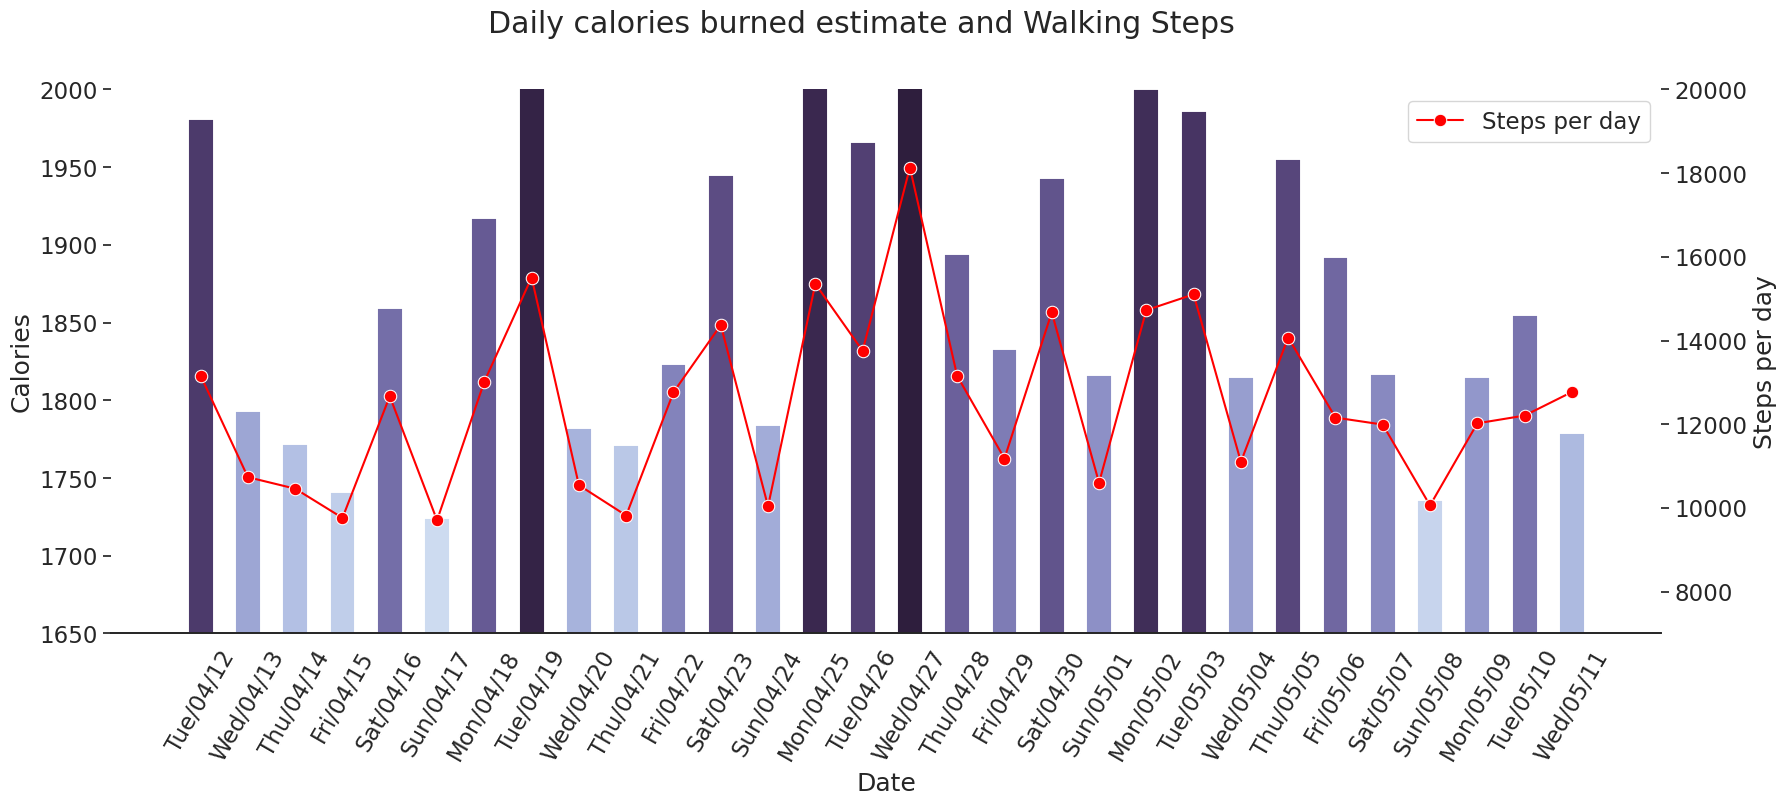

In [16]:
# define the canvas and axes
fig, ax = plt.subplots(figsize=(20,8), sharex=True)

# barplot example
bar = sns.barplot(ax=ax,
                  data=df,
                  x=df.index.strftime("%a/%m/%d"),
                  y="Calories",
                  label="Calories per day",
                  linewidth=10,)

# set bar color according to their heights
bar_color(bar, df.shape[0])
    
ax.set_xlabel("Date") # set name of x-axis
ax.set_ylim(ymax=2000, ymin=1650) # set ylim range to increase variances visually.

# get the twin y-axis
ax_twin = ax.twinx()

# implement your lineplot here

# Create a lineplot for step count
sns.lineplot(
    ax=ax_twin,
    data=df,
    x=df.index.strftime("%a/%m/%d"),
    y="TotalSteps",
    label="Steps per day",
    marker=".",
    markersize=18,
    color="red",
)

# Set y-axis label and limits for the twin axis
ax_twin.set_ylabel("Steps per day")
ax_twin.set_ylim(7000, 20000)  # Set the appropriate y-axis limit for step count

# define the global title
fig.suptitle("Daily calories burned estimate and Walking Steps")

# format the figure
sns.despine(top=True, right=True, left=True)

# format xticks
fig.autofmt_xdate(rotation=60,ha='center')

# show legend
plt.legend()

# show the plotting
plt.show()


From the above figure, we can see the **quantified** data of **daily calories burned estimate** and **walking steps** aggregated by day. 

Based on the visualization, how would you describe the subject's behaviour during the time range?

- How would you describe the subjects' physical activity on a [general level](https://static-content.springer.com/esm/art%3A10.1038%2Fnature23018/MediaObjects/41586_2017_BFnature23018_MOESM1_ESM.pdf)?
- Are there any noticeable [trends, seasonal or cyclic patterns](https://otexts.com/fpp2/tspatterns.html) in the data?

&#x1F4DD; **TASK:** Write your answer in the box below using a few sentences (try to keep your answer short):


It is possible to note that in general the subject has an average of about 12,500 steps per day. Considering that a generally recommended value is 10,000 steps [(reference)](https://www.medicalnewstoday.com/articles/how-many-steps-should-you-take-a-day), we can say that the number of daily steps taken is on average more than sufficient. On average, the subject burns about 1,900 calories per day. Considering that on average, women should aim to burn around 2,000 calories per day, while men should shoot for around 2,500  [(reference)](https://www.medicalnewstoday.com/articles/how-many-steps-should-you-take-a-day), we can say that if the subject is a woman, the calories burned are average. If the subject is a man, the value is a bit low.
The days when the most steps are taken, and consequently when the most calories are burned, are typically Monday and Tuesday, even though there are spikes on other days of the week as well, such as Wednesday, April 27th, or Thursday, May 5th. 

---

## 5. Calories burned estimate Heatmap <a class="anchor" id="section_5"></a>

In this section, we'll use the [pandas pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) to **summarize the normalized daily calories burned estimate by month and day order**.

### 5.1. Extract month and day from index <a class="anchor" id="section_5_1"></a>

&#x1F4DD; **TASK:** Extract *month* and *day* from the dataframe **df** `DateTimeIndex` values.

> *Hint*: Check what attributes are available for [Pandas DataTimeIndex](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html).

In [37]:
# extract months and days respectively
month = df.index.month
day = df.index.day

In [38]:
# UNIT TEST (do not modify)
assert month[10] == 4 and month[19] == 5
assert day[0] == 12 and day[18] == 30


### 5.2 Using the pivot table to measure calories burned estimate by months and days <a class="anchor" id="section_5_2"></a>

Now we can use `pandas.pivot_table` function to summarize the daily calories burned estimate. Set the `index` and `columns` parameters with `month` and `day`, respectively, and `values` as `Calories`. It's always a good practice to **check and fill in the missing values** after each processing step.

&#x1F4DD; **TASK:**
- Create a pivot table using the scaled dataframe. The pivot table should have rows corresponding to months, and columns corresponding to days.
- Fill in any missing values in the pivot table with zeros. 

In [50]:
fp = None

# Create the pivot table
fp = pd.pivot_table(df_scaled, 
                    index=df_scaled.index.month, 
                    columns=df_scaled.index.day, 
                    values='Calories', 
                    fill_value=0)
fp.rename(index={4: 'April', 5: 'May'}, inplace=True)
# view of the pivot table
fp

ActivityDay,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
ActivityDay,,,,,,,,,,,,,,,,,,,,,
April,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.109049,0.229698,0.512761,0.139211,0.661253,0.561485,1,0.394432,0.2529,0.508121
May,0.213457,0.640371,0.607889,0.211137,0.535963,0.389791,0.215777,0.027842,0.211137,0.303944,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.0000,0.000000


In [ ]:
fp.columns

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
      dtype='int32', name='ActivityDay')

In [51]:
# UNIT TEST (do not modify)
assert fp is not None
assert fp.iloc[0,0] == 0, "do not forget to prune our Nan values"
assert fp.iloc[0, 12] == 0.16009280742459397
assert fp.iloc[0, 20] == 0.10904872389791183
assert fp.iloc[0, 21] == 0.2296983758700696


#### 5.3. Generate Heatmap <a class="anchor" id="section_5_3"></a>
Now run the next cell, you will be able to see a heatmap of the subject's daily calories burned estimate during the experiment.

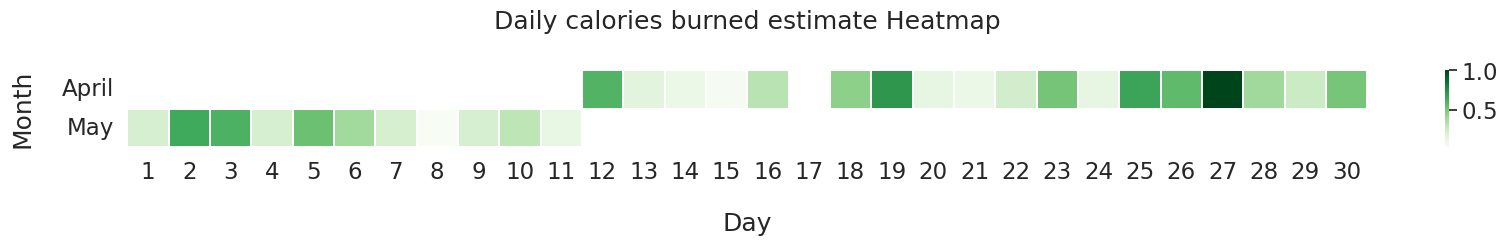

In [52]:
fig, ax = plt.subplots(figsize=(20,1))
sns.heatmap(ax=ax, data=fp, cmap="Greens", linewidths = 0.05, mask=(fp==0), fmt="d")
ax.set_xlabel("Day", labelpad=20)
ax.set_ylabel("Month", labelpad=20)
ax.set_title("Daily calories burned estimate Heatmap", pad=30)
plt.show()

The heatmap above clearly shows us the subject's activity intensity during the experiment time period.

&#x1F4DD; **TASK:** During the experiment, **on which day did the subject burned the most calories**? Specify the correct date in the next cell.

In [62]:
max_calories_day = fp.max().idxmax()
answer = int(max_calories_day)
print("The subject burned the most calories on day:", answer)

The subject burned the most calories on day: 27


In [63]:
# UNIT TEST (do not modify)
assert isinstance(answer, int), "answer should be an integer"


Next, compare the two above visualization methods. Can you think of situation where lineplot would be a more suitable method? How about the heatmap?

&#x1F4DD; **TASK:** Write the answer in the box below using a few sentences (try to keep your answer short):

In general, an heatmap is useful for a more impactful visualization thanks to the use of colors, making it easier to get a general idea. On the other hand, a line plot is more useful when one seeks greater precision in observing variations.

---

## 6. Correlations between Features <a class="anchor" id="section_6"></a>

In this section, we will explore data feature correlations. Your task is to calculate the **Pearson Correlation Coefficient Matrix** among all features and plot the correlation matrix by using the [sns.heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function. 

Don't worry; before you start, we will recap and cover all the essential concepts needed in this exercise.

### 6.1. What is Correlation? <a class="anchor" id="section_6_1"></a>

Correlation is a statistic that measures the degree to which two random variables (numerical) change in relation to each other. As a side note, it is important to recall that [*Correlation does not imply causation*](https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation)[4]. The strength or degree of correlation is measured with different *correlation coefficients*, of which the *Pearson correlation coefficient* is the most common. Other coefficients include for example *Spearman's rank correlation coefficient* and  *Kendall's rank correlation coefficients*. Those are out of the scope of this exercise, yet we still recommend checking them out. 

For more details, consult your favorite undergraduate statistics handbook, or check the links below:

[A guide to appropriate use of Correlation coefficient in medical research](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3576830/)

[Wikipedia article about correlation](https://en.wikipedia.org/wiki/Correlation)

[STAT 200 | Elementary Statistics course notes](https://online.stat.psu.edu/stat200/lesson/12/12.2)

### 6.2. What is Pearson Correlation Coefficient? <a class="anchor" id="section_6_2"></a>
The Pearson correlation coefficient measures the strength of the linear relationship between two features (variables) and their association.

$$p(x,y) = \frac{cov(x,y)}{\sigma_x \sigma_y}$$

where,
- $\sigma_x$ is the standard deviation of feature $x$
- $\sigma_y$ is the standard deviation of feature $y$
- $cov(x,y)$ is the covariance of feature $x$ and $y$

You can find more details in the reference link below:

[Person's product-moment coefficient Wikipedia article](https://en.wikipedia.org/wiki/Correlation#Pearson's_product-moment_coefficient) [5].

### 6.3. Standard Deviation <a class="anchor" id="section_6_3"></a>

A standard deviation is a statistic that measures the dispersion of a dataset relative to its mean. The standard deviation is calculated as the square root of variance by determining each data point's deviation relative to the mean. If the data points are further from the mean, there is a higher deviation within the data set; thus, the more spread out the data, the higher the standard deviation.

$$std = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \hat x)^{2}}{n}}$$

where:
- $x_i$ is the value of the $i_{th}$ element in the array
- $\hat x$ is the mean value of the array
- $n$ equals to the number of elements in the array

You can find more details in the reference link below:

[Standard deviation Wikipedia article](https://en.wikipedia.org/wiki/Correlation#Pearson's_product-moment_coefficient) [6].

### 6.4. Covariance <a class="anchor" id="section_6_4"></a>
Covariance is a measurement of the relationship between 2 variables that are scale-dependent, i.e., how much will the value of a variable changes when another variable changes. The covariance is defined by the following equation:

$$ cov(x,y) = \sum_{1}^{i} \frac{(x_i - \hat x)(y_i - \hat y)}{N} $$

Where,

- $x_i$ is the $i_{th}$ observation in feature x
- $\hat x$ is the mean from all samples of feature x
- $y_i$ is the $i_{th}$ observation in feature y
- $\hat y$ is the mean from all samples of feature y
- $N$ is the number of observations

You can find more details in the reference link below:

[Covariance Wikipedia article](https://en.wikipedia.org/wiki/Correlation#Pearson's_product-moment_coefficient) [7].

&#x1F4DD; **TASK:** Implement the **Pearson** function based on the information given above.

You should build your solution **from scratch** by using basic numpy operations, such as `np.std()` and `np.multiply()`.

Using functions such as `df.corr()` is **NOT** allowed! 

In [67]:
def pearson(array: np.ndarray) -> np.ndarray:
    """
    Args:
        A 2-D numpy array where each column represents a feature, and each row represents an observation.

    Returns:
        A 2-D numpy array of dimension NxN, where position (i, j) stores the Pearson correlation coefficient between feature i and j.

    Raises:
        TypeError if the input is not an np.ndarray
        AttributeError if the shape of the input array is not 2
    """

    if not isinstance(array, np.ndarray):
        raise TypeError("Input type should be an np.ndarray")

    if len(array.shape) != 2:
        raise AttributeError("Input shape should be in two dimensions")

    num_features = array.shape[1]
    corr_matrix = np.zeros((num_features, num_features))

    for i in range(num_features):
        for j in range(num_features):
            if i == j:
                corr_matrix[i, j] = 1.0  # The correlation of a feature with itself is always 1
            else:
                # Calculate Pearson correlation coefficient
                mean_i = np.mean(array[:, i])
                mean_j = np.mean(array[:, j])
                std_i = np.std(array[:, i])
                std_j = np.std(array[:, j])
                covariance = np.mean(np.multiply(array[:, i] - mean_i, array[:, j] - mean_j))
                corr_matrix[i, j] = covariance / (std_i * std_j)

    return corr_matrix



In [69]:
# UNIT TEST (do not modify)

# test 1
expected_pearson_mat = np.array([
    [1.0, 1.0, 1.0],
    [1.0, 1.0, 1.0],
    [1.0, 1.0, 1.0]
])
assert np.array_equal(
            pearson(
                np.array([
                    [1,2,3],
                    [2,3,4],
                    [3,4,5]
                ])
            ).round(2),
            expected_pearson_mat
        ), "invalid solution"

# test 2
expected_pearson_mat = np.array(
    [
        [1.0, -0.48, -0.63, 0.33],
        [-0.48, 1.0, -0.21, -0.91],
        [-0.63, -0.21, 1.0, 0.1],
        [0.33, -0.91, 0.1, 1.0],
    ]
)
assert np.array_equal(
    pearson(
        np.array([
            [1,4,7,3],
            [2,5,2,3],
            [3,2,5,6],
            [6,3,2,4]
        ])
    ).round(2),
    expected_pearson_mat
), "invalid solution"


### 6.5 Visualization of the Pearson Correlation Coefficient Matrix <a class="anchor" id="section_6_5"></a>

&#x1F4DD; **TASK:**

Now that you have the matrix, complete the [heatmap](https://en.wikipedia.org/wiki/Heat_map) visualization displaying correlations between each feature. We use Seaborn [sns.heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap) function for the task.

To get full credits, you should also:
- display the coefficient values (annotations)
- display **only** the lower triangle of the matrix (exclude diagonals)
- use color map **"Greys"**
- set both axes ticks to the corresponding column names
- set the title as **"Correlation Matrix"** with an appropriate fontsize.

> *Hint*: sns.heatmap takes a parameter named `mask` that tells the function to hide the data in cells where `mask` is True. The mask can be formed by the function [np.triu](https://numpy.org/doc/stable/reference/generated/numpy.triu.html).

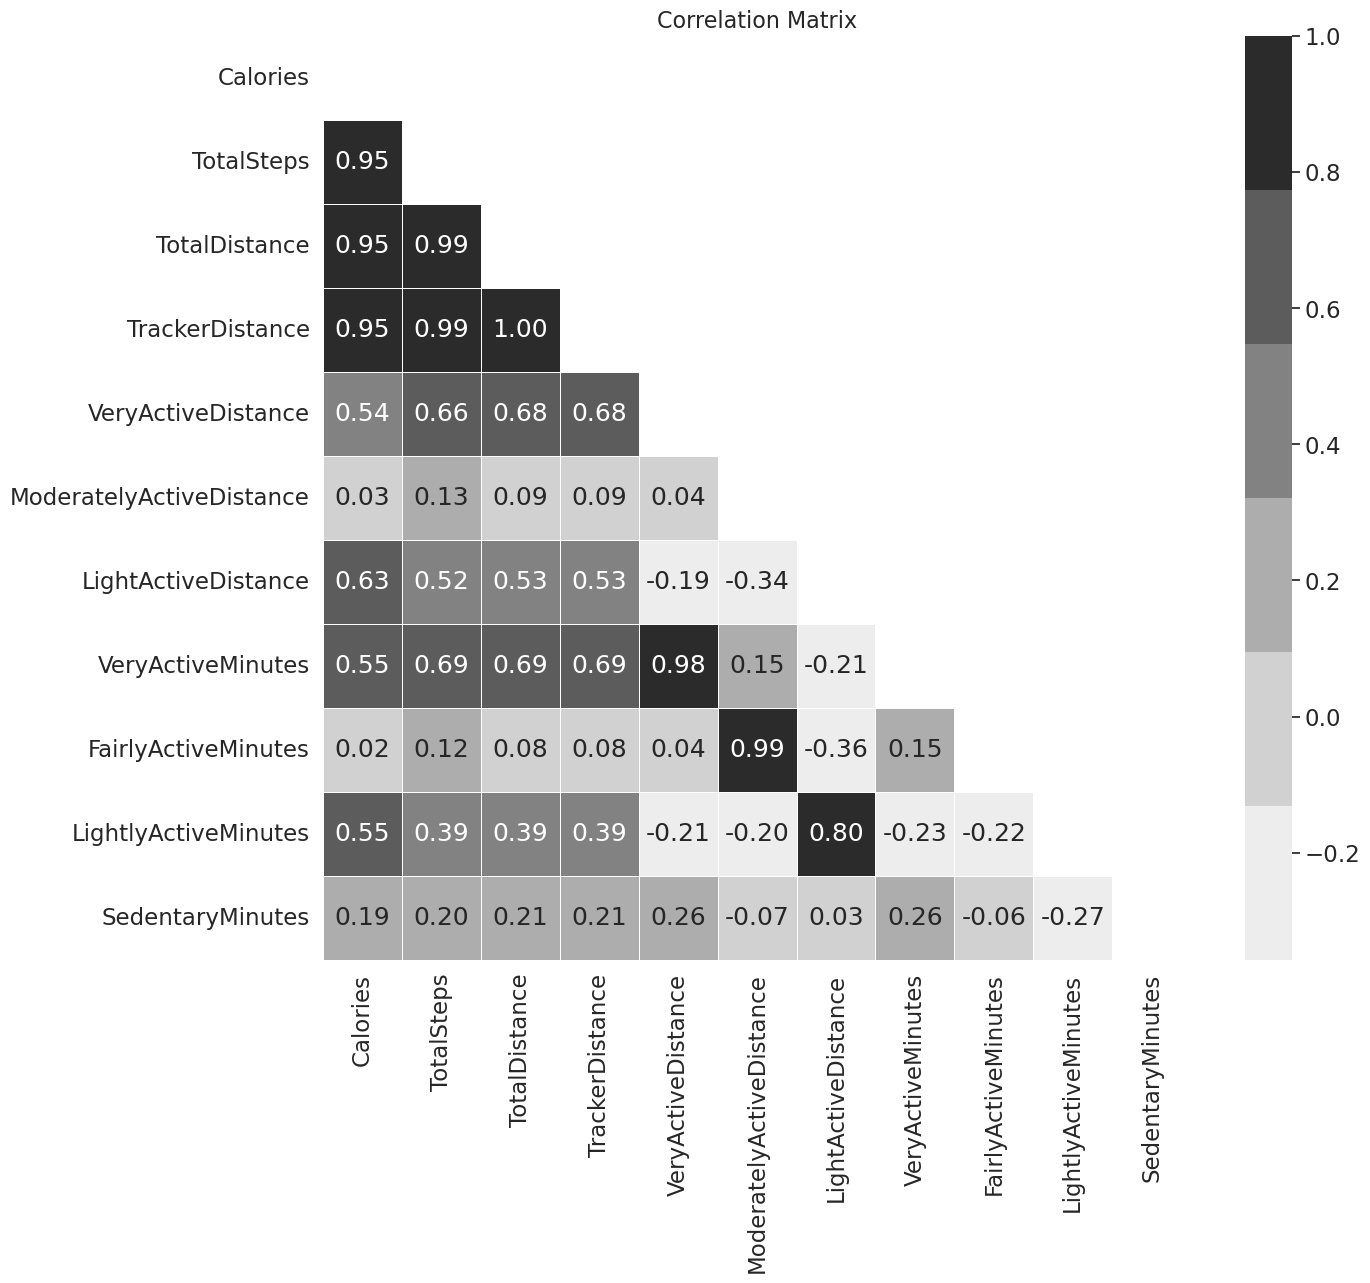

In [70]:
# calculate pearson correlation matrix (except the Weekday)
correlation_matrix = pearson(df.iloc[:,:-1].to_numpy())

# define the canvas
fig = plt.figure(figsize=(14, 12))

# get the axis
ax = fig.gca()

# Create a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Define the color map
cmap = sns.color_palette("Greys")

# Create the heatmap with annotations
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",  # Format for displaying coefficients with 2 decimal places
    linewidths=0.5,
    cmap=cmap,
    mask=mask,  # Hide the upper triangle of the matrix
    ax=ax,
)

# Set x and y axis labels to column names
ax.set_xticklabels(df.columns[:-1], rotation=90)
ax.set_yticklabels(df.columns[:-1], rotation=0)

# Set the title
plt.title("Correlation Matrix", fontsize=16)

# show the plotting
plt.show()

We can easily find some **strongly correlated feature combinations** from the above figure, such as **TotalSteps-Calories**. Now let's try to explore further with these two features.

We'll start by visualizing all pairwise relationships in the data by [sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function.

/opt/software/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

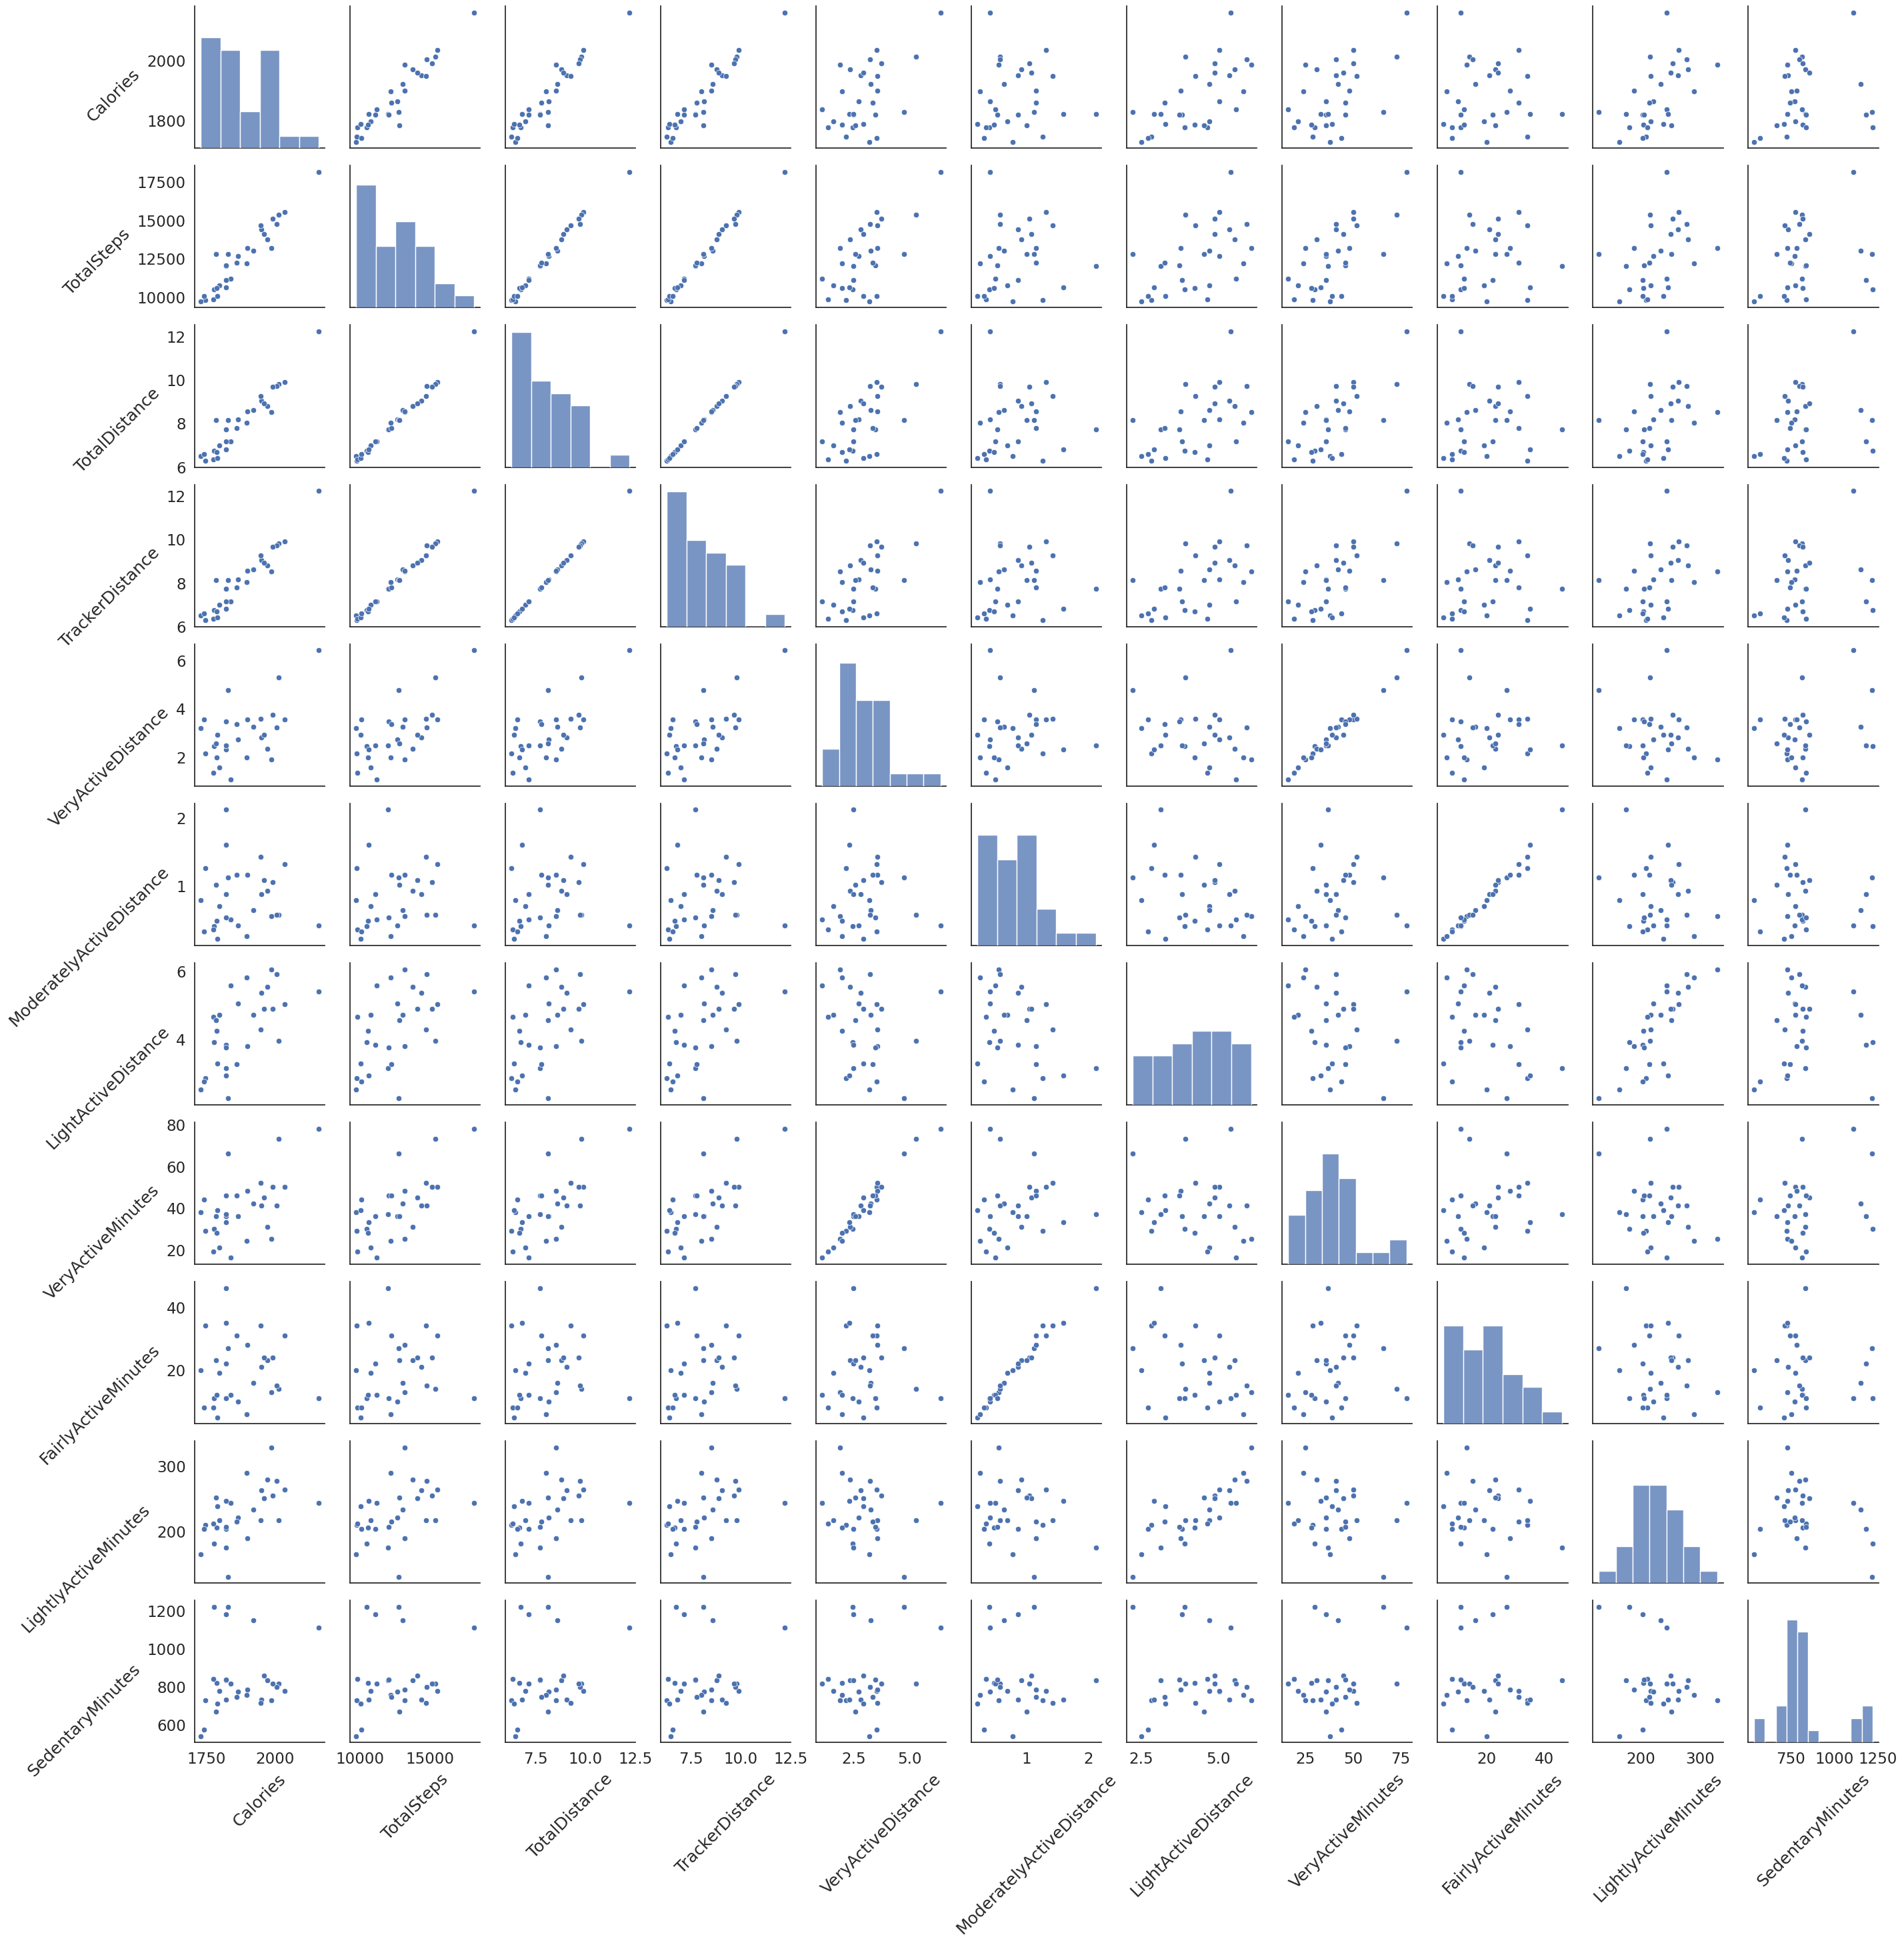

In [71]:
# We only choose a few columns to show, otherwise, the plot will be very big
plt.figure()
g = sns.pairplot(df)
# rotating labels for better readability
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 45)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
plt.show()

Here we see that there is a strong linear correlation between calories burn, total step count, and distance-related features. This information is important if we want to identify, for example, redundant features or [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) in the dataset.

### 6.6. Bivariate Plotting <a class="anchor" id="section_6_6"></a>

The bivariate correlation (in this case, linear) between **Calories** and **TotalSteps** can also be interpreted by other visualization functions, such as [sns.jointplot()](https://seaborn.pydata.org/generated/seaborn.jointplot.html) function. The function is capable of drawing **bivariate plots** with **univariate marginal distributions**.

&#x1F4DD; **TASK:** Plot the relationship between **Calories** and **TotalSteps** using `sns.jointplot()`.

The `kind="reg"` parameter in the `jointplot` function is used to specify that we want to visualize a regression line along with the scatter plot. This regression line represents the best linear fit to the data and provides an understanding of the relationship between the two variables. It's especially helpful when you want to quickly see if there's a linear trend between the plotted variables and get a sense of its direction and strength.

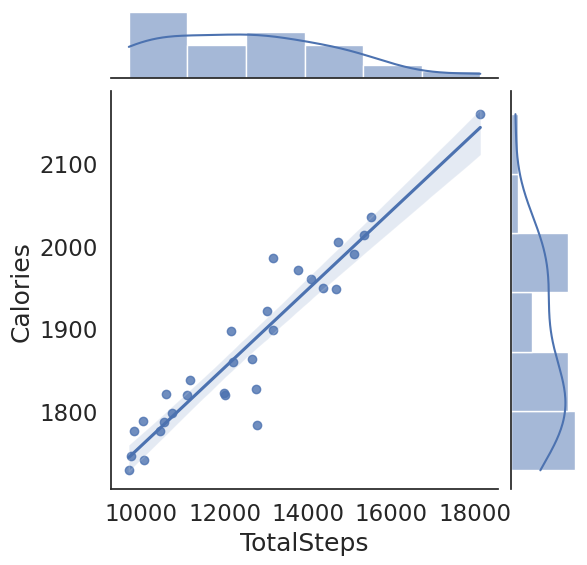

In [74]:
sns.jointplot(x='TotalSteps', y='Calories', data=df, kind='reg')
plt.show()

From the visualization we notice, that the features have a strong linear relationship.

Finally, we'll quickly explore the effect of outliers (deviating datapoint) on linear regression.

&#x1F4DD; **TASK:** Plot the relationship between **SedentaryMinutes** and **Calories** using `sns.jointplot()`.

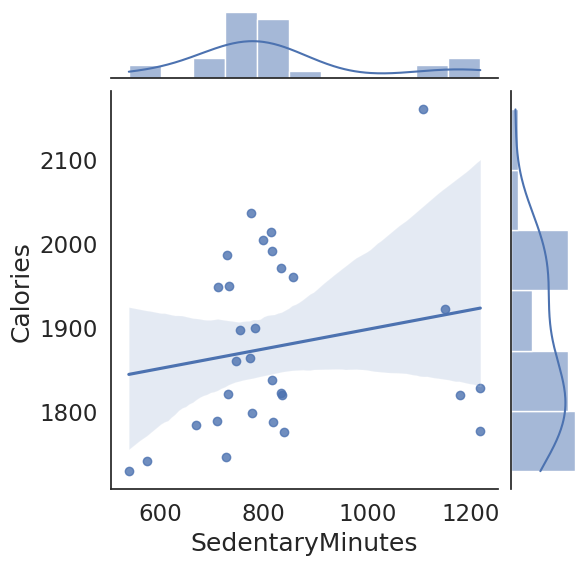

In [76]:
sns.jointplot(x='SedentaryMinutes', y='Calories', data=df,  kind='reg')
plt.show()

There is one datapoint with an exceptionally high daily calories burned estimate. Try to see what happens if you remove it and use `sns.jointplot` again on **SedentaryMinutes** and **Calories**.

&#x1F4DD; **TASK:**

1. Start by removing **the datapoint with an exceptionally high daily calories burned estimate**.
2. Plot the jointplot again with the new dataframe.

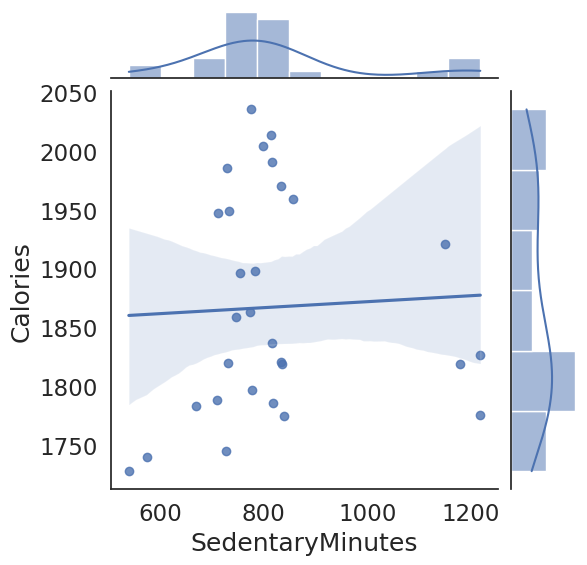

In [78]:
#selecting only the rows where the value in the "Calories" column is less than the maximum
#value found in the "Calories" column of the original DataFrame
df_3 = df[df['Calories'] < df['Calories'].max()]
sns.jointplot(x='SedentaryMinutes', y='Calories', data=df_3, kind='reg')
plt.show()

&#x1F4DD; **TASK:** Describe the effect of outliers in the box below. How do outliers impact the linear relationship assessment?

The presence of outliers certainly has an impact on the linear fit, as removing the outlier of high daily calories burned changes the slope of the fit. However, linear regression is not the most suitable tool for interpolating the data, which do not have a linear dependency.

## 7 References <a class="anchor" id="section_7"></a>

[1] Swan, M. (2013). The quantified self: Fundamental disruption in big data science and biological discovery. Big data, 1(2), 85-99. https://doi.org/10.1089/big.2012.0002

[2] Evenson, K. R., Goto, M. M., & Furberg, R. D. (2015). Systematic review of the validity and reliability of consumer-wearable activity trackers. International Journal of Behavioral Nutrition and Physical Activity, 12(1), 1-22. https://doi.org/10.1186/s12966-015-0314-1

[3] Brickwood, K. J., Watson, G., O'Brien, J., & Williams, A. D. (2019). Consumer-based wearable activity trackers increase physical activity participation: systematic review and meta-analysis. JMIR mHealth and uHealth, 7(4), e11819. https://mhealth.jmir.org/2019/4/e11819/